# Evaluation of Clustering Algorithms

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score,calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the excel table into df
# (REQUIRES THE EXCEL FILE PROVIDED IN THE ZIP FOLDER, MAKE SURE THE DIRECTORY IS CHANGED BEFORE RUNNING)
df = pd.read_excel("/Users/mathias/Documents/UoM/YEAR3/THIRD YEAR PROJECT/10524826/S&P_500_End_of_Year_2020_Fundamental_FINAL.xlsx")

# Set the index to 'Ticker'
df.set_index('Ticker', inplace = True)

df

,Feature,Value
Ticker,,
A,Basic Earnings per Share,2.3300
AAPL,Basic Earnings per Share,3.3100
ABC,Basic Earnings per Share,-16.6500
ABT,Basic Earnings per Share,2.5200
ADBE,Basic Earnings per Share,10.9400
...,...,...
XOM,Dividend Payout Ratio,103.5146
XRAY,Dividend Payout Ratio,31.8108
YUM,Dividend Payout Ratio,62.8053


In [4]:
# Pivot to make the fundamental ratios the features and the stocks the rows
df = df.pivot(columns='Feature', values='Value')

# Remove 'feature' label
df.columns.name = None

In [5]:
df

,Accounts Payable Turnover,Accounts Receivable Turnover,Asset Turnover,Basic Earnings per Share,Cash Ratio,Current Market Cap,Current Ratio,Dividend Payout Ratio,EBITDA,EBITDA Margin,...,Price/Cash Flow,Profit Margin,Quick Ratio,Retained Earnings,Return on Assets,Return on Common Equity,Return on Invested Capital,Total Debt to EBITDA,Total Debt to Total Assets,Total Debt to Total Equity
Ticker,,,,,,,,,,,,,,,,,,,,,
A,7.1836,5.4258,0.5597,2.33,0.9823,3.635860e+04,2.3279,30.9430,1200.000,22.4761,...,39.7540,13.4669,1.6898,81.000,7.5371,14.9465,9.9199,2.1142,26.3530,52.0624
AAPL,3.8294,14.0611,0.8288,3.31,0.8629,2.255969e+06,1.3636,24.0284,78844.000,28.7212,...,28.5402,20.9136,1.0159,14966.000,17.3341,73.6856,28.1960,1.5509,37.7532,187.1440
ABC,6.1984,14.4774,4.5513,-16.65,0.1358,1.996746e+04,0.9764,39.3123,-4609.197,-2.4272,...,9.0708,-1.7951,0.5448,518.335,-8.1698,29.4358,-40.7516,2.7919,10.3843,150.1203
ABT,4.3620,5.8464,0.4929,2.52,0.6003,1.940559e+05,1.7167,60.6730,9013.000,26.0431,...,24.5698,12.9883,1.1390,27627.000,6.4015,14.0750,8.7984,2.2068,27.4163,60.2672
ADBE,6.6809,8.7752,0.5713,10.94,1.0871,2.399171e+05,1.4779,0.0000,5113.000,39.7342,...,42.0041,40.8766,1.3407,19611.000,23.3537,44.2125,33.4394,0.9208,19.3873,35.4946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XOM,9.3329,7.5115,0.5136,-5.25,0.0774,1.742878e+05,0.7965,103.5146,16909.000,9.4689,...,12.0024,-12.5662,0.4426,383943.000,-6.4543,-12.8670,-8.7760,4.3058,21.8801,44.3587
XRAY,5.1843,4.5938,0.3725,-0.38,0.3326,1.144355e+04,1.3599,31.8108,379.000,11.3405,...,18.0745,-2.4835,0.8436,1233.000,-0.9250,-1.6501,-0.5053,6.4776,26.2792,49.3964
YUM,7.7629,10.1109,1.0199,2.99,0.4358,3.274909e+04,1.0084,62.8053,1726.000,30.5379,...,25.1227,15.9943,0.7546,-7480.000,16.3133,104.3938,31.9855,6.7468,198.9918,402.8718


In [6]:
# Drop stocks with missing values (78 stocks removed)
df = df.dropna()

In [7]:
# Standardise the data 
standard_scaler = StandardScaler()
X_standardised = standard_scaler.fit_transform(df)

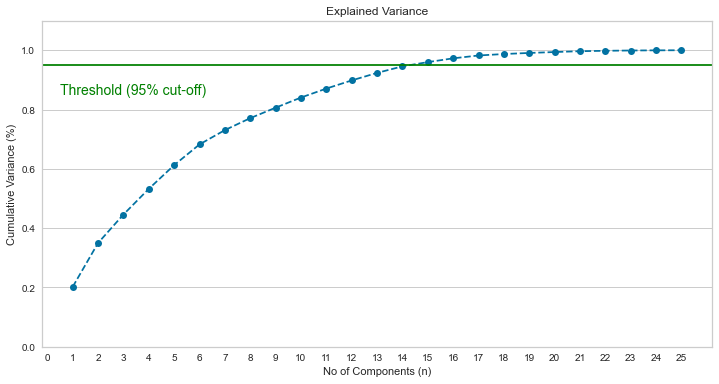

In [8]:
# Apply PCA to reduce the number of dimensions
# Plot explained variance graph to determine number of principle components
pca = PCA().fit(X_standardised)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 26, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('No of Components (n)')
plt.xticks(np.arange(0, 26, step=1))
plt.ylabel('Cumulative Variance (%)')
plt.title('Explained Variance')

plt.axhline(y=0.95, color='green', linestyle='-')
plt.text(0.5, 0.85, 'Threshold (95% cut-off)', color = 'green', fontsize=14)

ax.grid(axis='x')
plt.show()

14 Principal Components have a Cumulative Variance of 95%, so we will use 14 Principal Components.

In [9]:
# Fit PCA to standardised data using 14 components
X = PCA(n_components=14).fit(X_standardised).transform(X_standardised)

We will now use the Silhouette, Davies-Bouldin and Calinksi-Harabasz indices to determine an optimal number of clusters. Please note that even though some lower numbers (e.g. 2 or 3) give the best performance, for the purpose of this investigation which is determining a diverisifed portfolio of stocks, this is not ideal. Therefore, we will be looking for local maxima and minima in our graphs, which a have a higher number of clusters.

# K-MEANS CLUSTERING

In [10]:
# Test number of clusters from 2 to 16
K = range(2,17)

## k-means - Elbow Method 

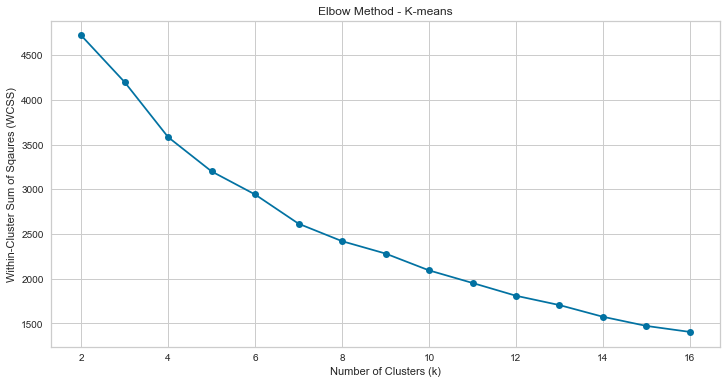

In [13]:
sum_of_squared_distances_k_means = []

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, random_state = 0)
    kmeans.fit(X)
    sum_of_squared_distances_k_means.append(kmeans.inertia_)
    
plt.plot(K, sum_of_squared_distances_k_means, marker='o', color='b')
plt.xlabel('Number of Clusters (k)') 
plt.ylabel('Within-Cluster Sum of Sqaures (WCSS)') 
plt.title('Elbow Method - K-means')
plt.show()

Potential Optimal Number of Clusters: 5, 7

## k-means - Silhouette Index 

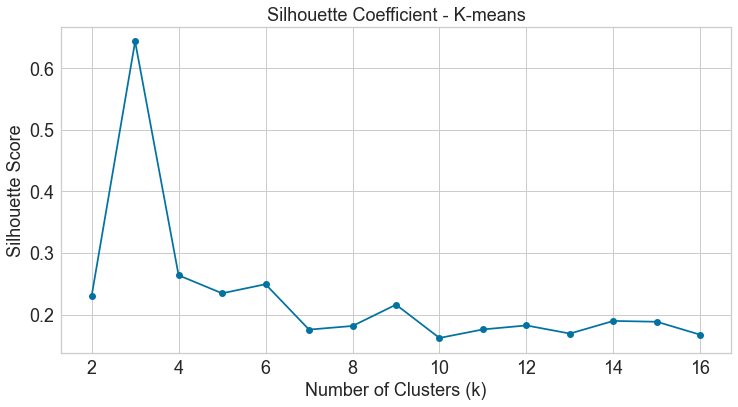

In [40]:
silhouette_k_means = []

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_k_means.append(silhouette_score(X, cluster_labels))
    
plt.plot(K, silhouette_k_means, marker='o', color='b')
plt.xlabel('Number of Clusters (k)', fontsize=18) 
plt.ylabel('Silhouette Score', fontsize=18) 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Silhouette Coefficient - K-means', fontsize=18)
plt.show()

Potential Optimal Number of Clusters: 3, 6, 9, 12, 14

## k-means - Davies-Bouldin Index 

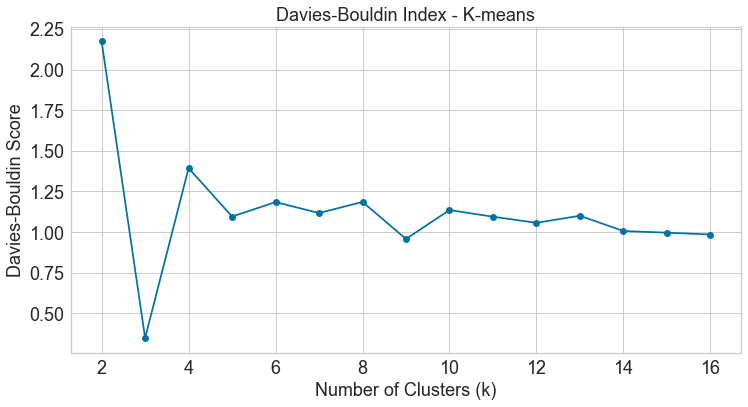

In [48]:
davies_bouldin_k_means = []

for num_clusters in K:
    
    kmeans = KMeans(n_clusters=num_clusters, random_state = 0)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    davies_bouldin_k_means.append(davies_bouldin_score(X, cluster_labels))

plt.plot(K, davies_bouldin_k_means, marker='o', color='b')
plt.xlabel("Number of Clusters (k)", fontsize=18)
plt.ylabel("Davies-Bouldin Score", fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Davies-Bouldin Index - K-means', fontsize=18)
plt.show()

Potential Optimal Number of Clusters: 3, 5, 7, 9, 12, 14

## k-means - Calinski-Harabasz Index 

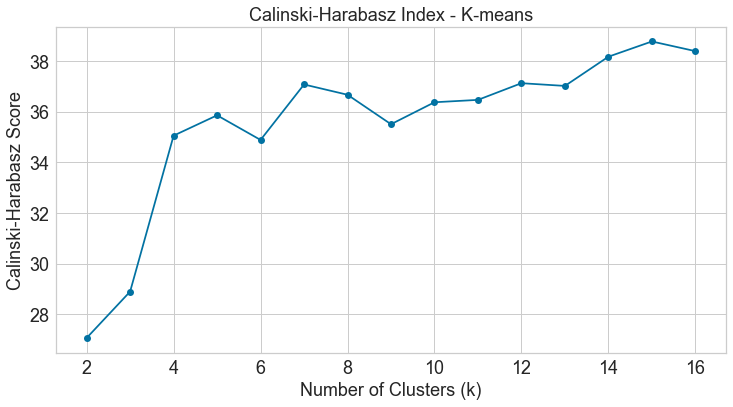

In [43]:
calinski_harabasz_k_means = []

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, random_state = 0)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    calinski_harabasz_k_means.append(calinski_harabasz_score(X, cluster_labels))
    
plt.plot(K, calinski_harabasz_k_means, marker='o', color='b')
plt.xlabel("Number of Clusters (k)", fontsize=18)
plt.ylabel("Calinski-Harabasz Score", fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Calinski-Harabasz Index - K-means', fontsize=18)
plt.show()

Potential Optimal Number of Clusters: N/A

## K-MEANS - Silhouette Plot

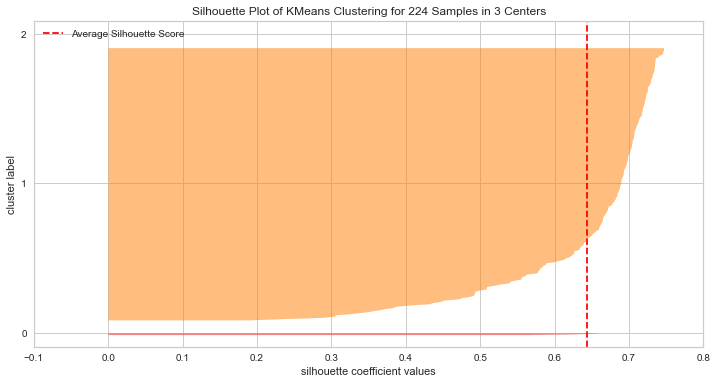

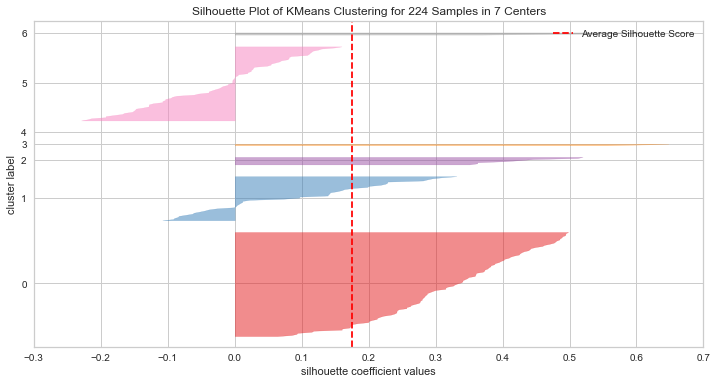

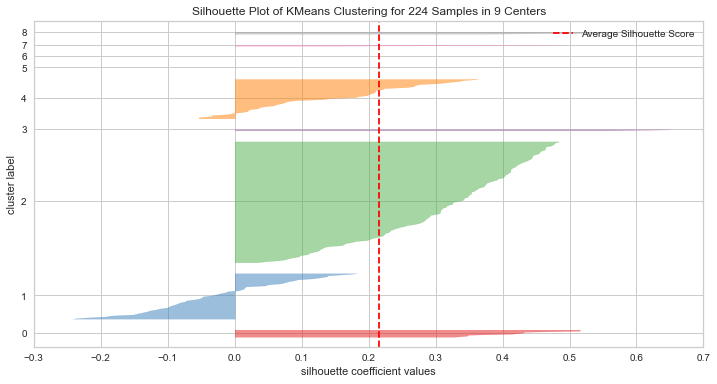

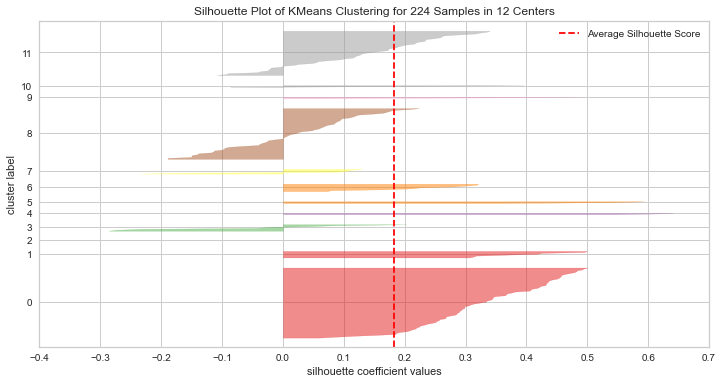

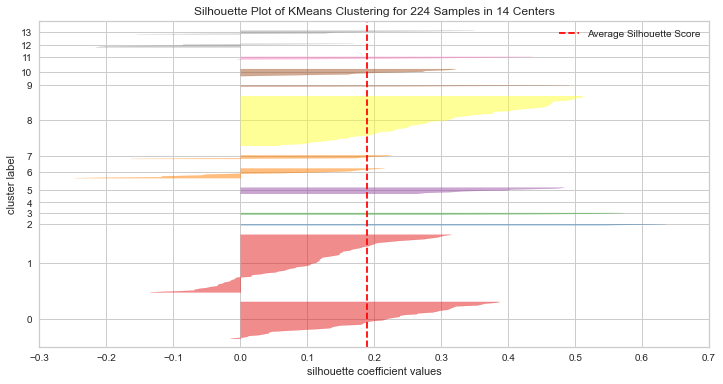

In [14]:
# The potential number of optimal clusters derived from previous graphs
clusters = [3, 7, 9, 12, 14]

for cluster in clusters:
    
    # Create k-means object
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # Apply k-means to the visualiser
    visualizer = SilhouetteVisualizer(kmeans)

    # Have the visualiser fit k-means to the data
    visualizer.fit(X)

    # Display silhouette plot
    visualizer.poof()

Potential Optimal Number of Clusters: 12, 14 

K-MEANS Optimal Number of Clusters: 14 
- Was identified as a possible optimal number based on Silhouette index
- Was identified as a possible optimal number based on Davies-Bouldin index
- Has the most evenly spread clusters after looking at the silhouette plots


# BIRCH CLUSTERING

## BIRCH - Silhouette Index 

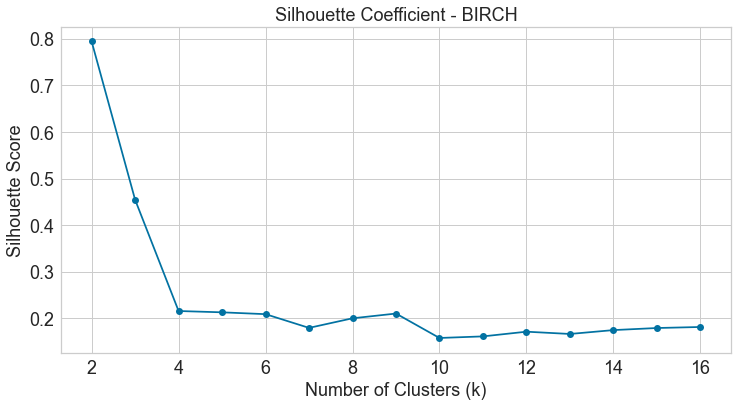

In [41]:
silhouette_birch = []

for num_clusters in K:
    birch = Birch(branching_factor = 50, n_clusters=num_clusters, threshold = 0.5) 
    birch.fit(X)
    cluster_labels = birch.labels_
    silhouette_birch.append(silhouette_score(X, cluster_labels))
    
plt.plot(K, silhouette_birch, marker='o', color='b')
plt.xlabel('Number of Clusters (k)', fontsize=18) 
plt.ylabel('Silhouette Score', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Silhouette Coefficient - BIRCH', fontsize=18)
plt.show()


Potential Optimal Number of Clusters: 6, 9, 12, 14

## BIRCH - Davies-Bouldin Index 

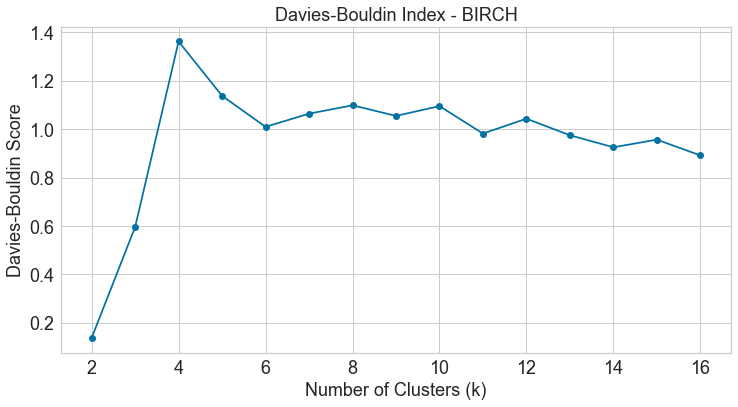

In [47]:
davies_bouldin_birch = []

for num_clusters in K:
    birch = Birch(branching_factor = 50, n_clusters=num_clusters, threshold = 0.5)
    birch.fit(X)
    cluster_labels = birch.labels_
    davies_bouldin_birch.append(davies_bouldin_score(X, cluster_labels))

plt.plot(K, davies_bouldin_birch, marker='o', color='b')
plt.xlabel("Number of Clusters (k)", fontsize=18)
plt.ylabel("Davies-Bouldin Score", fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Davies-Bouldin Index - BIRCH', fontsize=18)
plt.show()

Potential Optimal Number of Clusters: 6, 9, 14

## BIRCH - Calinski-Harabasz Index 

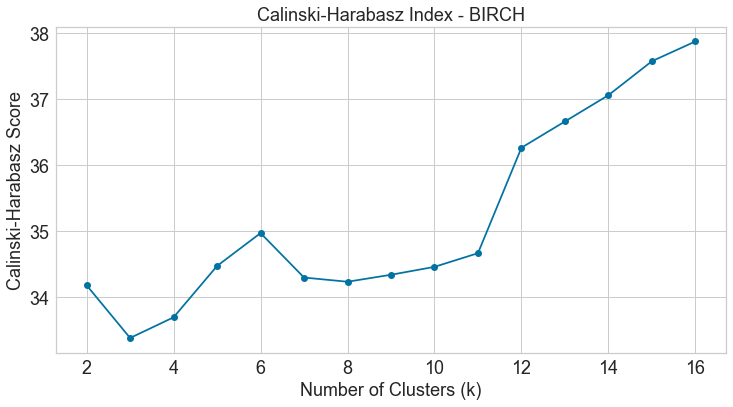

In [44]:
calinski_harabasz_birch = []

for num_clusters in K:
    birch = Birch(branching_factor = 50, n_clusters=num_clusters, threshold = 0.5)
    birch.fit(X)
    cluster_labels = birch.labels_
    calinski_harabasz_birch.append(calinski_harabasz_score(X, cluster_labels))

plt.plot(K, calinski_harabasz_birch, marker='o', color='b')
plt.xlabel("Number of Clusters (k)", fontsize=18)
plt.ylabel("Calinski-Harabasz Score", fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Calinski-Harabasz Index - BIRCH', fontsize=18)
plt.show()

Potential Optimal Number of Clusters: 6, 12

## BIRCH - Silhouette Plot

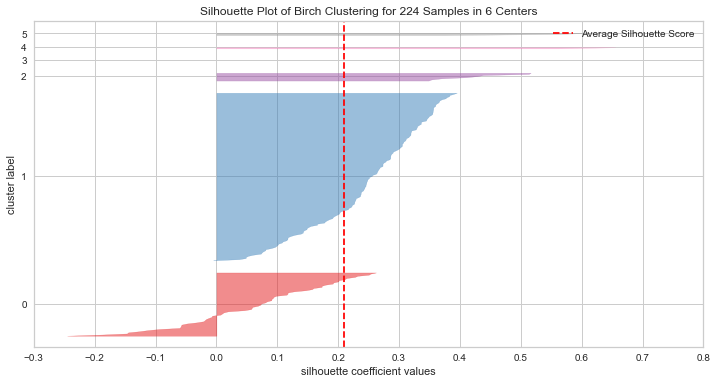

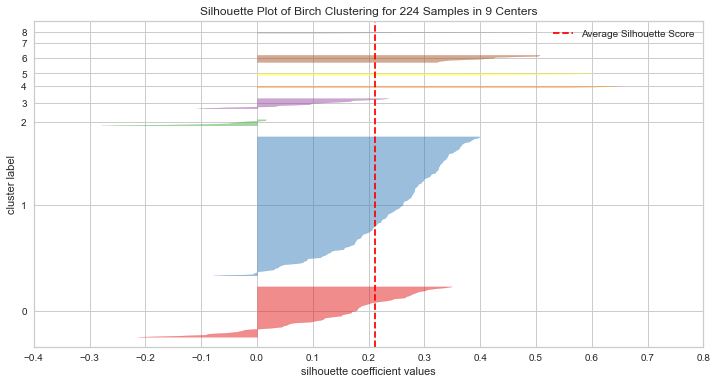

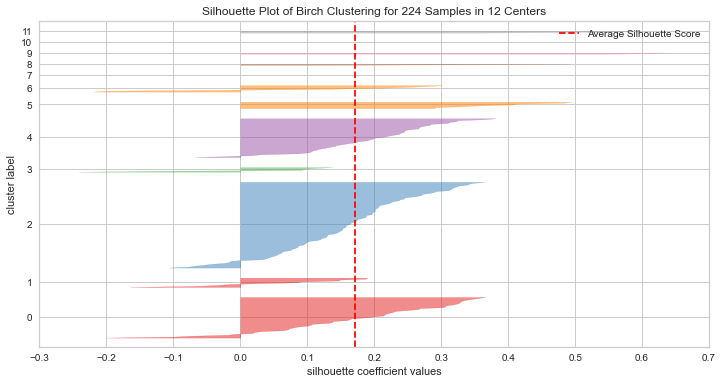

In [18]:
# The potential number of optimal clusters derived from previous graphs
potential_optimal_clusters = [6, 9, 12]

for cluster_no in potential_optimal_clusters:

    # Create birch object
    birch = Birch(branching_factor = 50, n_clusters=cluster_no, threshold = 0.5)

    # Apply birch to the visualiser
    visualizer = SilhouetteVisualizer(birch)

    # Have the visualiser fit birch to the data
    visualizer.fit(X)

    # Display silhouette plot
    visualizer.poof()

Potential Optimal Number of Clusters: 12

BIRCH Optimal Number of Clusters: 12 
- Was identified as a possible optimal number based on Silhouette index
- Was identified as a possible optimal number based on Calinksi-Harabasz index
- Has the most evenly spread clusters after looking at the silhouette plots

# AGGLOMERATIVE CLUSTERING

WM = Ward's Method, AL = Average Linkage, CL = Complete Linkage 

## WM , AL , CL - Silhouette Index 

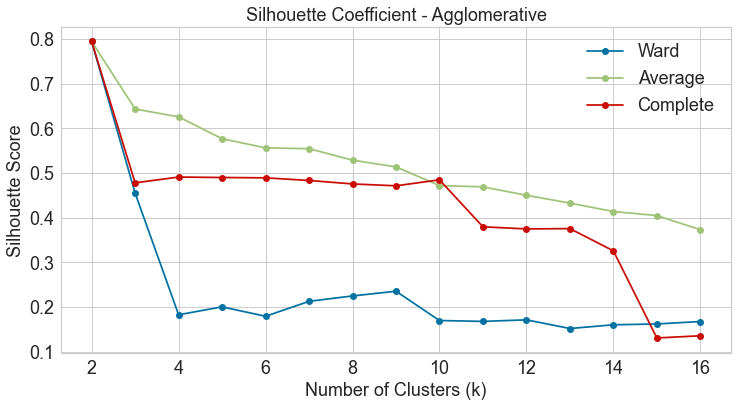

In [42]:
silhouette_wm = []
silhouette_al = []
silhouette_cl = []

for num_clusters in K:
    wm = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
    wm.fit(X)
    cluster_labels = wm.labels_
    silhouette_wm.append(silhouette_score(X, cluster_labels))
    
for num_clusters in K:
    al = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='average')
    al.fit(X)
    cluster_labels = al.labels_
    silhouette_al.append(silhouette_score(X, cluster_labels))

for num_clusters in K:
    cl = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='complete')
    cl.fit(X)
    cluster_labels = cl.labels_
    silhouette_cl.append(silhouette_score(X, cluster_labels))

plt.plot(K, silhouette_wm, marker='o', label = "Ward")
plt.plot(K, silhouette_al, marker='o', label = "Average")
plt.plot(K, silhouette_cl, marker='o', label = "Complete")

plt.xlabel('Number of Clusters (k)', fontsize=18) 
plt.ylabel('Silhouette Score', fontsize=18) 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Silhouette Coefficient - Agglomerative', fontsize=18)
plt.legend(fontsize=18)
plt.show()


Potential Optimal Number of Clusters: 9, 10

## WM , AL , CL - Davies Bouldin Index 

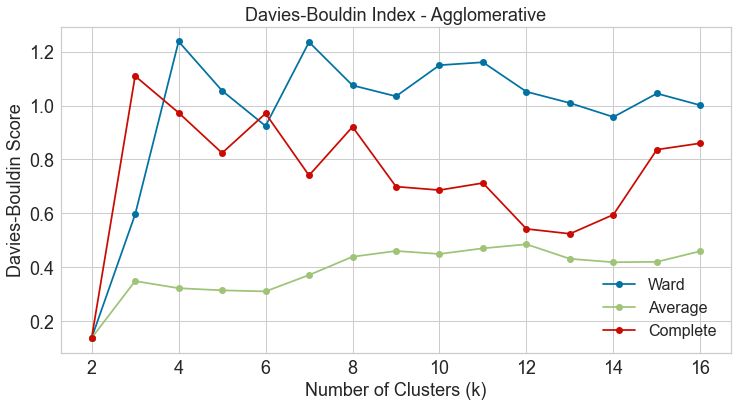

In [46]:
davies_bouldin_wm = []
davies_bouldin_al = []
davies_bouldin_cl = []

for num_clusters in K:
    wm = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
    wm.fit(X)
    cluster_labels = wm.labels_
    davies_bouldin_wm.append(davies_bouldin_score(X, cluster_labels))
    
for num_clusters in K:
    al = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='average')
    al.fit(X)
    cluster_labels = al.labels_
    davies_bouldin_al.append(davies_bouldin_score(X, cluster_labels))

for num_clusters in K:
    cl = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='complete')
    cl.fit(X)
    cluster_labels = cl.labels_
    davies_bouldin_cl.append(davies_bouldin_score(X, cluster_labels))

plt.plot(K, davies_bouldin_wm, marker='o', label = "Ward")
plt.plot(K, davies_bouldin_al, marker='o', label = "Average")
plt.plot(K, davies_bouldin_cl, marker='o', label = "Complete")

plt.xlabel("Number of Clusters (k)", fontsize=18)
plt.ylabel("Davies-Bouldin Score", fontsize=18)
plt.title('Davies-Bouldin Index - Agglomerative', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.legend(fontsize=16)
plt.show()


Potential Optimal Number of Clusters: 6, 9, 10

## WM , AL , CL - Calinski-Harabasz Index 

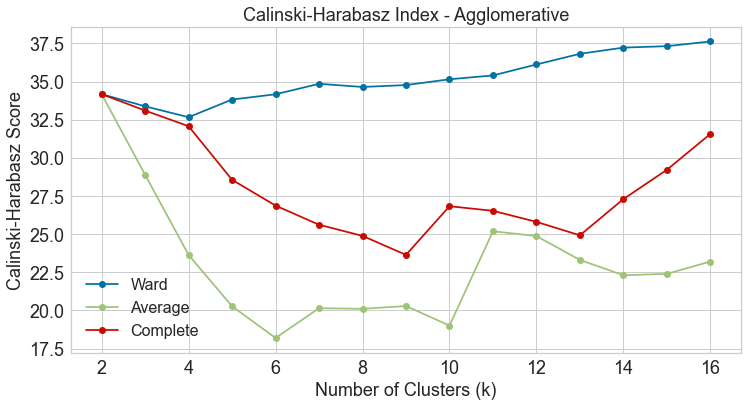

In [49]:
calinski_harabasz_wm = []
calinski_harabasz_al = []
calinski_harabasz_cl = []

for num_clusters in K:
    wm = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
    wm.fit(X)
    cluster_labels = wm.fit_predict(X)
    calinski_harabasz_wm.append(calinski_harabasz_score(X, cluster_labels))
    
for num_clusters in K:
    al = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='average')
    al.fit(X)
    cluster_labels = al.fit_predict(X)
    calinski_harabasz_al.append(calinski_harabasz_score(X, cluster_labels))

for num_clusters in K:
    cl = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='complete')
    cl.fit(X)
    cluster_labels = cl.fit_predict(X)
    calinski_harabasz_cl.append(calinski_harabasz_score(X, cluster_labels))

plt.plot(K, calinski_harabasz_wm, marker='o', label = "Ward")
plt.plot(K, calinski_harabasz_al, marker='o', label = "Average")
plt.plot(K, calinski_harabasz_cl, marker='o', label = "Complete")

plt.xlabel("Number of Clusters (k)", fontsize=18)
plt.ylabel("Calinski-Harabasz Score", fontsize=18)
plt.title('Calinski-Harabasz Index - Agglomerative', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.legend(fontsize=16)
plt.show()


Potential Optimal Number of Clusters: 7

## WM - Silhouette Plot

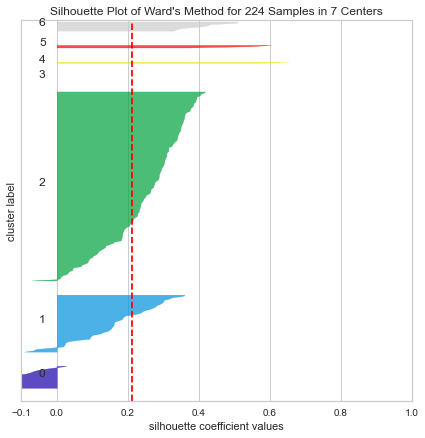

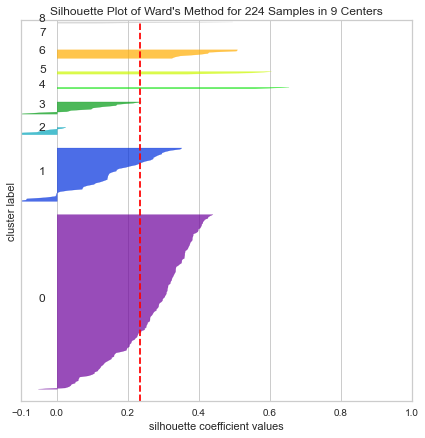

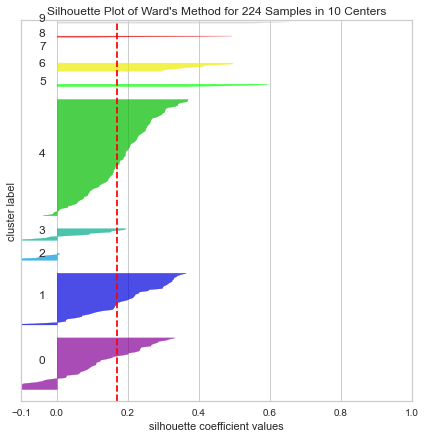

In [22]:
# The potential number of optimal clusters determined by previous graphs
potential_optimal_clusters = [7, 9, 10]

# Part of this code is based off an open-source notebook referenced in this link
# https://www.kaggle.com/code/kevzzsk/hierarchical-clustering/notebook
for cluster_no in potential_optimal_clusters:
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(7, 7)
    
    # Set axis limits and space between clusters on y axis
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (cluster_no) * 10])
    
    # Fit ward's method to data
    wm = AgglomerativeClustering(n_clusters=cluster_no, affinity='euclidean', linkage='ward')
    cluster_labels = wm.fit_predict(X)
    
    # Calculate average silhouette score
    average_silhouette = silhouette_score(X, cluster_labels)
    
    # Each sample will have their silhouette score calculated
    silhouette_sample_values = silhouette_samples(X, cluster_labels)
    
    low_y = 10
    
    for i in range(cluster_no):
        
        # Assign score to assoicated cluster and sort
        current_cluster_silhouette_values = silhouette_sample_values[cluster_labels == i]
        current_cluster_silhouette_values.sort()
        
        # Get the size of the cluster
        size_current_cluster = current_cluster_silhouette_values.shape[0]
        high_y = low_y + size_current_cluster
        
        # Get colour 
        color = cm.nipy_spectral(float(i+1) / cluster_no)
        ax1.fill_betweenx(np.arange(low_y, high_y), 0, current_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Add cluster number label and centre it 
        ax1.text(-0.05, low_y + 0.5 * size_current_cluster, str(i))

        # Calculate new low_y
        low_y = high_y + 10  
    
    # Set title and axis labels
    ax1.set_title("Silhouette Plot of Ward's Method for 224 Samples in " + str(cluster_no) + " Centers")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("cluster label")
    
    
    # Add average line
    ax1.axvline(x=average_silhouette, color="red", linestyle="--")
    
    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

## AL - Silhouette Plot

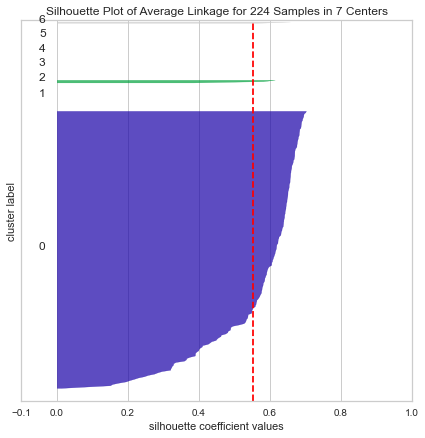

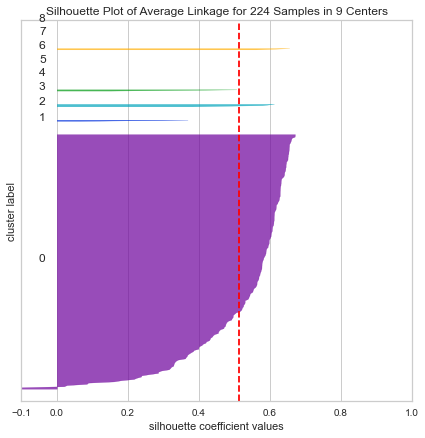

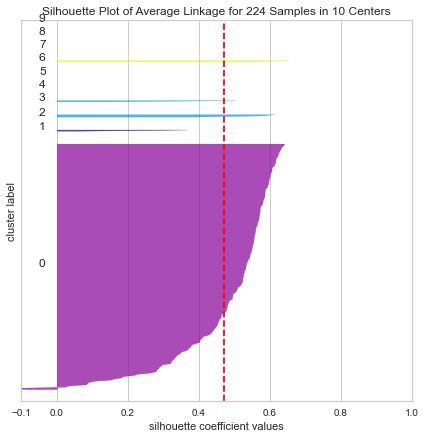

In [23]:
# The potential number of optimal clusters derived from previous graphs
potential_optimal_clusters = [7, 9, 10]

for cluster_no in potential_optimal_clusters:
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(7, 7)
    
    # Set axis limits and space between clusters on y axis
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (cluster_no) * 10])
    
    # Fit average linkage method to data
    al = AgglomerativeClustering(n_clusters=cluster_no, affinity='euclidean', linkage='average')
    cluster_labels = al.fit_predict(X)
    
    # Calculate average silhouette score
    average_silhouette = silhouette_score(X, cluster_labels)
    
    # Each sample will have their silhouette score calculated
    silhouette_sample_values = silhouette_samples(X, cluster_labels)
    
    low_y = 10
    
    for i in range(cluster_no):
        
        # Assign score to assoicated cluster and sort
        current_cluster_silhouette_values = silhouette_sample_values[cluster_labels == i]
        current_cluster_silhouette_values.sort()
        
        # Get the size of the cluster
        size_current_cluster = current_cluster_silhouette_values.shape[0]
        high_y = low_y + size_current_cluster
        
        # Get colour 
        color = cm.nipy_spectral(float(i+1) / cluster_no)
        ax1.fill_betweenx(np.arange(low_y, high_y), 0, current_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Add cluster number label and centre it 
        ax1.text(-0.05, low_y + 0.5 * size_current_cluster, str(i))

        # Calculate new low_y
        low_y = high_y + 10  
    
    # Set title and axis labels
    ax1.set_title("Silhouette Plot of Average Linkage for 224 Samples in " + str(cluster_no) + " Centers")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("cluster label")
    
    
    # Add average line
    ax1.axvline(x=average_silhouette, color="red", linestyle="--")
    
    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

## CL - Silhouette Plot

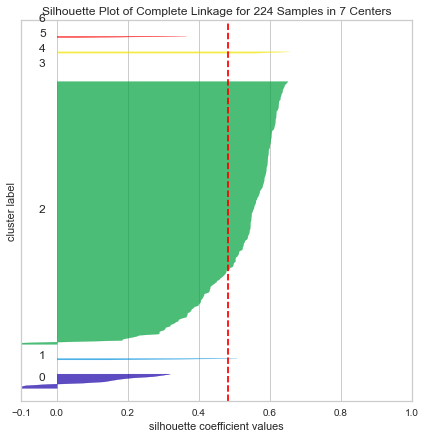

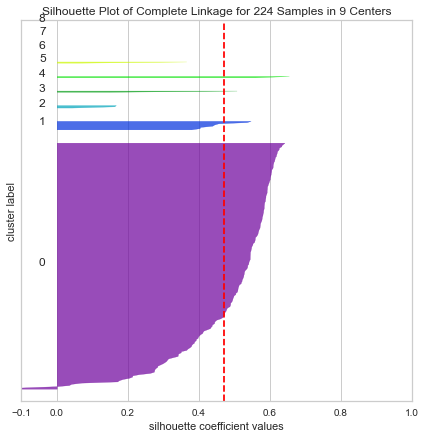

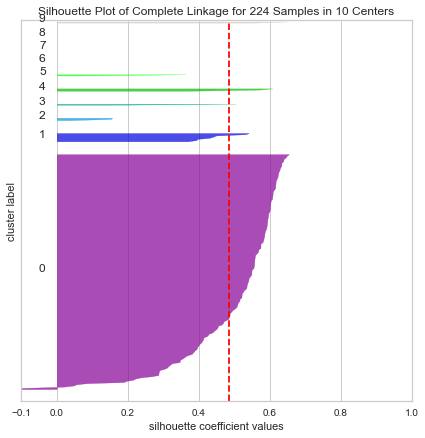

In [24]:
# The potential number of optimal clusters determined by previous graphs
potential_optimal_clusters = [7, 9, 10]

for cluster_no in potential_optimal_clusters:
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(7, 7)
    
    # Set axis limits and space between clusters on y axis
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (cluster_no) * 10])
    
    # Fit average linkage method to data
    cl = AgglomerativeClustering(n_clusters=cluster_no, affinity='euclidean', linkage='complete')
    cluster_labels = cl.fit_predict(X)
    
    # Calculate average silhouette score
    average_silhouette = silhouette_score(X, cluster_labels)
    
    # Each sample will have their silhouette score calculated
    silhouette_sample_values = silhouette_samples(X, cluster_labels)
    
    low_y = 10
    
    for i in range(cluster_no):
        
        # Assign score to assoicated cluster and sort
        current_cluster_silhouette_values = silhouette_sample_values[cluster_labels == i]
        current_cluster_silhouette_values.sort()
        
        # Get the size of the cluster
        size_current_cluster = current_cluster_silhouette_values.shape[0]
        high_y = low_y + size_current_cluster
        
        # Get colour 
        color = cm.nipy_spectral(float(i+1) / cluster_no)
        ax1.fill_betweenx(np.arange(low_y, high_y), 0, current_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Add cluster number label and centre it 
        ax1.text(-0.05, low_y + 0.5 * size_current_cluster, str(i))

        # Calculate new low_y
        low_y = high_y + 10  
    
    # Set title and axis labels
    ax1.set_title("Silhouette Plot of Complete Linkage for 224 Samples in " + str(cluster_no) + " Centers")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("cluster label")
    
    
    # Add average line
    ax1.axvline(x=average_silhouette, color="red", linestyle="--")
    
    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

Potential Optimal Number of Clusters: 10
- When the number of clusters is 10, WL has an evenly spread set of clusters

AGGLOMERATIVE Optimal Number of Clusters: 10 
- Was identified as a possible optimal number based on Silhouette index
- Was identified as a possible optimal number based on Davies index
- Has the most evenly spread clusters after looking at the WL Silhouette plot

## Comparison of Clustering Algorithms (Bar Charts for each Index)


Upon anlaysing the Silhouette, Davies-Bouldin and Calinski-Harabasz Index Plots, and also taking into account that a low number of clusters (e.g. 2 or 3) will not prove very useful for stock portfolio construction, it is determined that the following should be the optimal number of clusters for each of the Clustering Algorithms.

In [51]:
# k-means = 14, BIRCH = 12, Agglomerative = 10

no_of_kmeans_clusters = 14
no_of_birch_clusters = 12
no_of_hierarchical_clusters = 10

# Implementing k-means With Optimal Clusters
kmeans = KMeans(n_clusters=no_of_kmeans_clusters, random_state=0)
kmeans.fit(X)
cluster_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(X, cluster_labels)
kmeans_davies_bouldin = davies_bouldin_score(X, cluster_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(X, cluster_labels)

# Implementing BIRCH With Optimal Clusters
birch = Birch(threshold = 0.5, branching_factor = 50, n_clusters=no_of_birch_clusters) 
birch.fit(X)
cluster_labels = birch.labels_
birch_silhouette = silhouette_score(X, cluster_labels)
birch_davies_bouldin = davies_bouldin_score(X, cluster_labels)
birch_calinski_harabasz = calinski_harabasz_score(X, cluster_labels)

# Implementing Ward's Method With Optimal Clusters 
wm = AgglomerativeClustering(n_clusters=no_of_hierarchical_clusters, affinity='euclidean', linkage='ward')
wm.fit(X)
cluster_labels = wm.labels_
wm_silhouette = silhouette_score(X, cluster_labels)
wm_davies_bouldin = davies_bouldin_score(X, cluster_labels)
wm_calinski_harabasz = calinski_harabasz_score(X, cluster_labels)

# Implementing Average Linkage With Optimal Clusters 
al = AgglomerativeClustering(n_clusters=no_of_hierarchical_clusters, affinity='euclidean', linkage='average')
al.fit(X)
cluster_labels = al.labels_
al_silhouette = silhouette_score(X, cluster_labels)
al_davies_bouldin = davies_bouldin_score(X, cluster_labels)
al_calinski_harabasz = calinski_harabasz_score(X, cluster_labels)

# Implementing Complete Linkage With Optimal Clusters 
cl = AgglomerativeClustering(n_clusters=no_of_hierarchical_clusters, affinity='euclidean', linkage='complete')
cl.fit(X)
cluster_labels = cl.labels_
cl_silhouette = silhouette_score(X, cluster_labels)
cl_davies_bouldin = davies_bouldin_score(X, cluster_labels)
cl_calinski_harabasz = calinski_harabasz_score(X, cluster_labels)


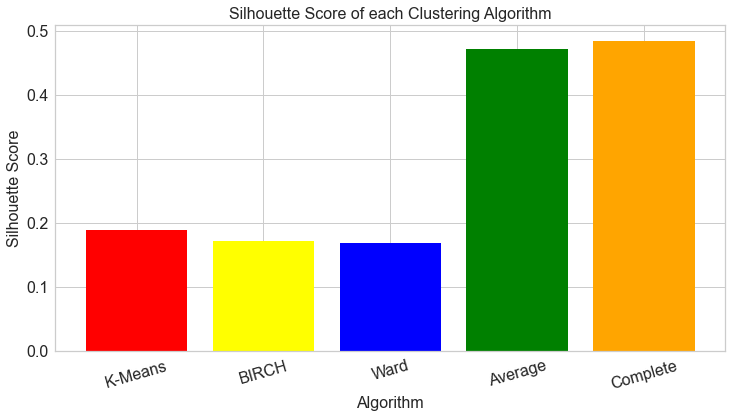

In [64]:
clustering_techniques = ['K-Means', 'BIRCH', 'Ward', 'Average', 'Complete']
h = [kmeans_silhouette, birch_silhouette, wm_silhouette, al_silhouette, cl_silhouette]
c = ['red', 'yellow', 'blue', 'green', 'orange']

plt.bar(clustering_techniques, height=h, color=c)
plt.title('Silhouette Score of each Clustering Algorithm', fontsize=16)
plt.xlabel('Algorithm', fontsize=16)
plt.ylabel('Silhouette Score', fontsize=16)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xticks(rotation=16)
plt.show()


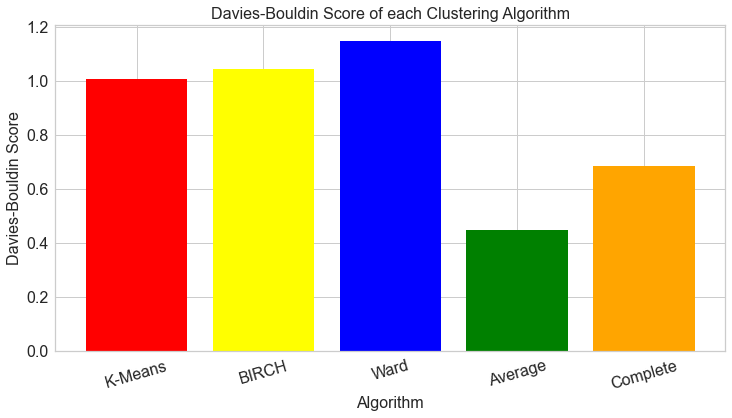

In [65]:
clustering_techniques = ['K-Means', 'BIRCH', 'Ward', 'Average', 'Complete']
h = [kmeans_davies_bouldin, birch_davies_bouldin, wm_davies_bouldin, al_davies_bouldin, cl_davies_bouldin]
c = ['red', 'yellow', 'blue', 'green', 'orange']

plt.bar(clustering_techniques, height=h, color=c)
plt.title('Davies-Bouldin Score of each Clustering Algorithm', fontsize=16)
plt.xlabel('Algorithm', fontsize=16)
plt.ylabel('Davies-Bouldin Score', fontsize=16)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xticks(rotation=16)
plt.show()

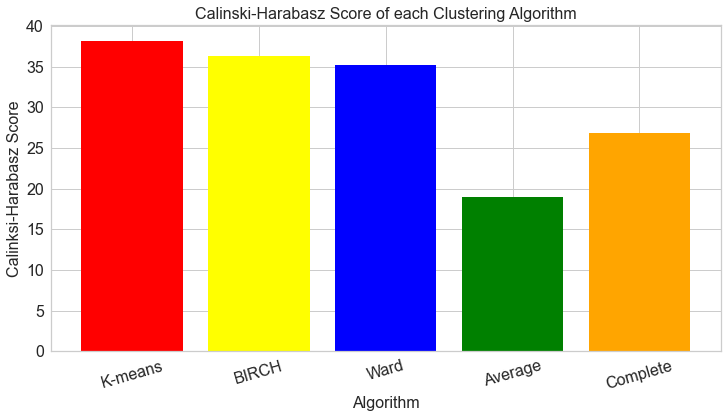

In [66]:
clustering_techniques = ['K-means', 'BIRCH', 'Ward', 'Average', 'Complete']
h = [kmeans_calinski_harabasz, birch_calinski_harabasz, wm_calinski_harabasz, al_calinski_harabasz, cl_calinski_harabasz]
c = ['red', 'yellow', 'blue', 'green', 'orange']

plt.bar(clustering_techniques, height=h, color=c)
plt.title('Calinski-Harabasz Score of each Clustering Algorithm', fontsize=16)
plt.xlabel('Algorithm', fontsize=16)
plt.ylabel('Calinksi-Harabasz Score', fontsize=16)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xticks(rotation=16)
plt.show()

Based off these results, Average Linkage, Complete Linkage and K-Means are the top three performing clustering algorithms. The clusters formed by these algorithms will be examined further by looking at the number of stocks in each cluster.

In [29]:
df['kmeans_labels'] = kmeans.labels_
df['birch_labels'] = birch.labels_
df['wm_labels']= wm.labels_
df['al_labels']= al.labels_
df['cl_labels']= cl.labels_

In [30]:
# Average Linkage - Count the Number of Stocks in Each Cluster
average_linkage_stocks_in_cluster = []
curr_no_of_stocks = 0
print("Average Linkage: Number of Stocks in Each Cluster")
print()
for i in range(0, no_of_hierarchical_clusters):
    curr_no_of_stocks = len(df.query('al_labels == @i').index)
    print("Cluster " + str(i+1) + ": " + str(curr_no_of_stocks))

Average Linkage: Number of Stocks in Each Cluster

Cluster 1: 210
Cluster 2: 2
Cluster 3: 3
Cluster 4: 2
Cluster 5: 1
Cluster 6: 1
Cluster 7: 2
Cluster 8: 1
Cluster 9: 1
Cluster 10: 1


In [31]:
# Complete Linkage - Count the Number of Stocks in Each Cluster
complete_linkage_stocks_in_cluster = []
curr_no_of_stocks = 0
print("Complete Linkage: Number of Stocks in Each Cluster")
print()
for i in range(0, no_of_hierarchical_clusters):
    curr_no_of_stocks = len(df.query('cl_labels == @i').index)
    print("Cluster " + str(i+1) + ": " + str(curr_no_of_stocks))

Complete Linkage: Number of Stocks in Each Cluster

Cluster 1: 201
Cluster 2: 8
Cluster 3: 3
Cluster 4: 2
Cluster 5: 3
Cluster 6: 2
Cluster 7: 1
Cluster 8: 1
Cluster 9: 1
Cluster 10: 2


In [32]:
# K-Means - Count the Number of Stocks in Each Cluster
k_means_stocks_in_cluster = []
curr_no_of_stocks = 0
print("K-Means: Number of Stocks in Each Cluster")
print()
for i in range(0, no_of_kmeans_clusters):
    curr_no_of_stocks = len(df.query('kmeans_labels == @i').index)
    print("Cluster " + str(i+1) + ": " + str(curr_no_of_stocks))

K-Means: Number of Stocks in Each Cluster

Cluster 1: 43
Cluster 2: 67
Cluster 3: 2
Cluster 4: 3
Cluster 5: 1
Cluster 6: 8
Cluster 7: 12
Cluster 8: 5
Cluster 9: 58
Cluster 10: 2
Cluster 11: 9
Cluster 12: 4
Cluster 13: 5
Cluster 14: 5


K-means provides a better split out of the three clustering algorithms and so K-means will be used to cluster our stocks.

Clusters that have 5 or less stocks are not appropriate to select stocks from so these will be merged into a new single cluster.

In [33]:
# Extract stock tickers from the clusters that have more than 5 stocks
kmeans_cluster_1 = df.query('kmeans_labels == 0').index.values.tolist()  
kmeans_cluster_2 = df.query('kmeans_labels == 1').index.values.tolist()  
kmeans_cluster_3 = df.query('kmeans_labels == 5').index.values.tolist() 
kmeans_cluster_4 = df.query('kmeans_labels == 6').index.values.tolist()
kmeans_cluster_5 = df.query('kmeans_labels == 8').index.values.tolist()
kmeans_cluster_6 = df.query('kmeans_labels == 10').index.values.tolist()

In [34]:
# Extract stock tickers from the clusters that have less than 5 stocks
clusters_with_five_or_less = []
curr_no_of_stocks = 0
kmeans_cluster_7 = []

# Adds all the tickers with less than 5 stocks to cluster 7
for i in range(0, no_of_kmeans_clusters):
    curr_no_of_stocks = len(df.query('kmeans_labels == @i').index)
    curr_cluster = df.query('kmeans_labels == @i').index.values.tolist()  
    if curr_no_of_stocks <= 5:
        kmeans_cluster_7 += curr_cluster

The final number of clusters is 7 and here are the number of stocks in each cluster.

In [35]:
print("No of Stocks in Each Cluster")
print()

print("Cluster 1:", len(kmeans_cluster_1))
print("Cluster 2:", len(kmeans_cluster_2))
print("Cluster 3:", len(kmeans_cluster_3))
print("Cluster 4:", len(kmeans_cluster_4))
print("Cluster 5:", len(kmeans_cluster_5))
print("Cluster 6:", len(kmeans_cluster_6))
print("Cluster 7:", len(kmeans_cluster_7))

No of Stocks in Each Cluster

Cluster 1: 43
Cluster 2: 67
Cluster 3: 8
Cluster 4: 12
Cluster 5: 58
Cluster 6: 9
Cluster 7: 27


We will use these clusters going forward.